<a href="https://colab.research.google.com/github/kiboiWanjohi/AirBnB_clone/blob/main/Copy_of_StatLectures_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>$\Huge{\textbf{School of Computational Techniques}}$
$\Huge{\textbf{for Physics Students in Kenya}}$

$\Huge{\text{Introduction to Statistical Data Analysis}}$

Christina Agapopoulou,
Kiplabat Tarus

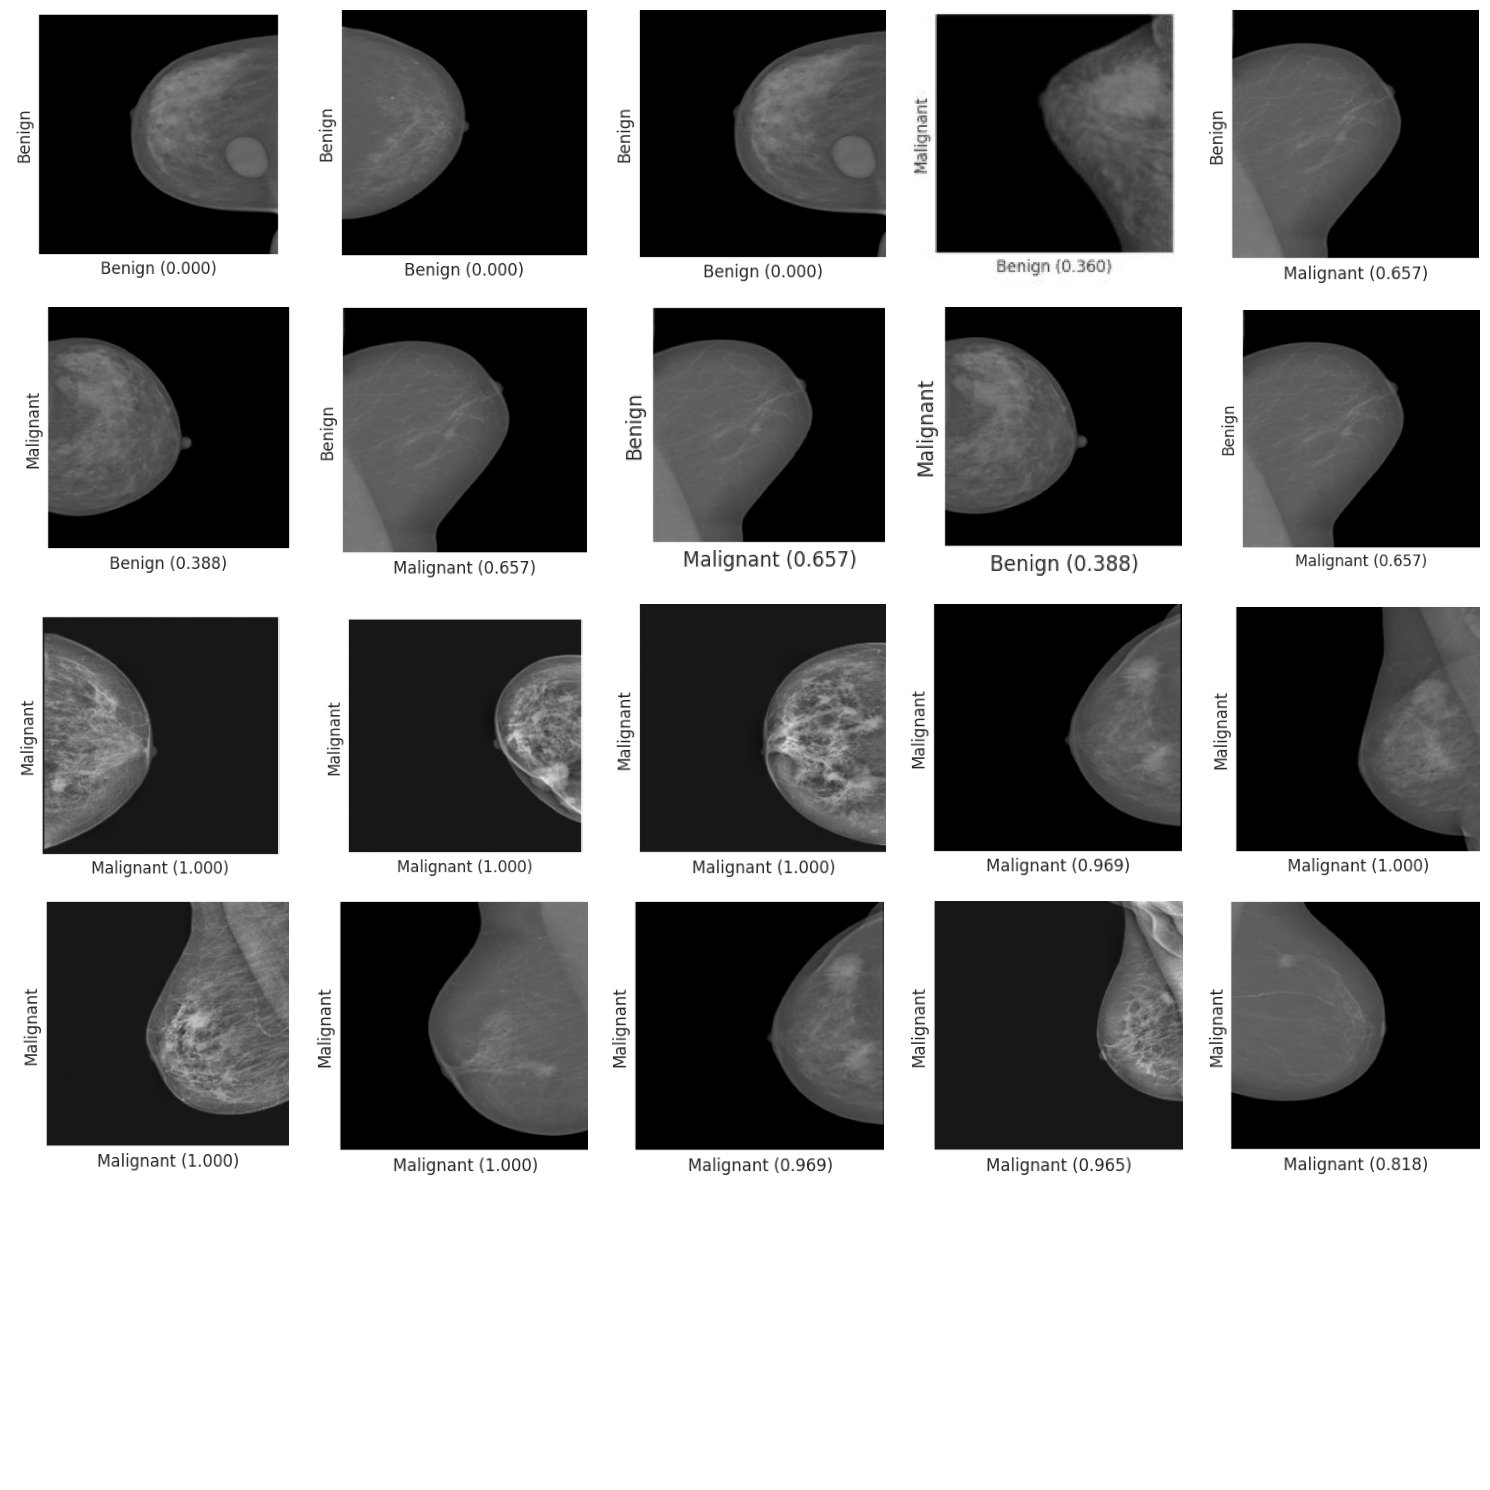

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Load all images (replace with your list of files if not using glob)
image_paths = [
  '/content/sample_data/benign-1.png',
  '/content/sample_data/benign-2.png',
  '/content/sample_data/benign-3.png',
  '/content/sample_data/benign-4.png',
    '/content/sample_data/benign-5.png',
  '/content/sample_data/benign-6.png',
  '/content/sample_data/benign-7.png',
    '/content/sample_data/benign-8.png',
  '/content/sample_data/benign-9.png',
  '/content/sample_data/benign-10.png',
  '/content/sample_data/malignant-1.png',
  '/content/sample_data/malignant-2.png',
  '/content/sample_data/malignant-3.png',
  '/content/sample_data/malignant-4.png',
  '/content/sample_data/malignant-5.png',
  '/content/sample_data/malignant-6.png',
  '/content/sample_data/malignant-7.png',
  '/content/sample_data/malignant-8.png',
  '/content/sample_data/malignant-9.png',
  '/content/sample_data/malignant-10.png',

]

images = [mpimg.imread(img) for img in image_paths]

# Grid size (5 rows × 5 cols = 25 slots, 5 will be blank)
rows, cols = 5, 5
plt.figure(figsize=(15, 15))

for i, img in enumerate(images):
    plt.subplot(rows, cols, i+1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")

# Fill the remaining slots with empty frames
for j in range(len(images), rows*cols):
    plt.subplot(rows, cols, j+1)
    plt.axis("off")

plt.tight_layout()
plt.savefig("mammograms_grid.png", dpi=300)
plt.show()


In [4]:
# number of images in image_paths
len(image_paths)

22

### The Central Limit Theorem


---



The central limit theorem states that, in the limit of large sampling, no matter what the distribution of the samples, their means are distributed by a Gaussian whose mean is the mean of the distribution and whose standard deviation decreases as $1/ \sqrt{n}$.

What does this tell us in practice? It tells us that if we measure a quantity over and over many times, its mean will be a Gaussian distributed variable centered around the true value - even if the quantity is not distributed gaussianly! And the more measurements we take, the less fluctuations we will get  when averaging.

Let's see how this works in practice.


---



In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define how many experiments we're going to generate, and how many events each will have
n = 1
sample_size = 1000

# Generate random samples from a normal distribution, each sample has 10000 events
samples = np.random.normal(loc=0, scale=1, size=(n, sample_size))
print("Shape of my samples array:", np.shape(samples))

# Calculate the mean and standard deviation for the array of sample means
sample_mean = np.mean(samples[0])
sample_std = np.std(samples[0])

print("Mean of 1st sample: %.3f" % sample_mean)
print("Standard deviation of 1st sample: %.3f"% sample_std)


plt.hist(samples[0], bins=50, edgecolor='black', density=True)
plt.show()



---


We have generated a random sample, of 1000 events, distributed gaussianly. How would we go about checking that the CLT is valid?


---



In [ ]:
# This is the array of the means of each sample
sample_means = np.mean(samples, axis=1)
print("Shape of my means-of-samples array:", np.shape(sample_means))
# Calculate the mean and standard deviation for the array of sample means
samples_mean = np.mean(sample_means)
samples_std = np.std(sample_means)
print("Mean of sample means: %.3f" % samples_mean)
print("Standard deviation of sample means %.3f"% samples_std)

# Plot the histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, edgecolor='black', density=True)
# Add labels and legend
plt.title('Histogram of Sample Means of a Normal Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()



---

It feels natural that the CLT holds for Gaussian distributions. But let's check that it really works for other types of distributions as well!

---



In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define how many experiments we're going to generate, and how many events each will have
n = 1
sample_size = 10000

# Generate random samples from a normal distribution, each sample has 10000 events
samples = np.random.exponential(2, size=(n, sample_size))

plt.hist(samples[0], bins=15, edgecolor='black', density=True)
# Calculate the mean and standard deviation for the array of sample means
sample_mean = np.mean(samples[0])
sample_std = np.std(samples[0])

print("Mean of 1st sample: %.3f" % sample_mean)
print("Standard deviation of 1st sample: %.3f"% sample_std)


plt.title('Example of the poison distribution')
plt.show()

# This is the array of the means of each sample
# axis = 1 tells us which dimension of our 2d array to average over
sample_means = np.mean(samples, axis=1)
print("Shape of my sample means distribution:", np.shape(sample_means))
# Calculate the mean and standard deviation for the array of sample means
samples_mean = np.mean(sample_means)
samples_std = np.std(sample_means)
print("Mean of sample means: %.3f" % samples_mean)
print("Standard deviation of sample means %.3f"% samples_std)

# Plot the histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=20, edgecolor='black')
# Add labels and legend
plt.title('Histogram of Sample Means of a Exponential Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()




---


There are situations where the CLT does not work well, typically when the sample size is too small or the underlying distribution has infinite variance (such as Cauchy distribution).


---



In [ ]:
# prompt: Show me an example of the Central Limit Theorem not working

import numpy as np
import matplotlib.pyplot as plt

# Number of samples to draw from the Cauchy distribution
sample_size = 1000

# Number of experiments to perform
num_experiments = 1000

# Draw samples from a Cauchy distribution
data = np.random.standard_cauchy((num_experiments, sample_size))

plt.hist(samples[0], bins=50, edgecolor='black')
plt.title('Example of the Cauchy distribution')
plt.show()

# Compute the means of these samples
sample_means = np.mean(data, axis=1)


# Plot the histogram of the sample means
plt.hist(sample_means, bins=100, range=[-10, 10], density=True, alpha=0.75, color='b', edgecolor='black')


# Add labels and legend
plt.title('Histogram of Sample Means of Cauchy Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()



---


We see that the Gaussian fit doesn't manage to describe well or distribution of sample means.

**Explanation**: The Cauchy distribution is known for its heavy tails and undefined variance and mean.
In the example, we draw sample_size samples from a standard Cauchy distribution for num_experiments times.
We then compute the mean of each set of samples.
Finally, we plot the histogram of these sample means.
What happens:
Unlike distributions with finite variance, the sample means from a Cauchy distribution do not converge to a normal distribution as the sample size increases.
Instead, they remain heavy-tailed and do not exhibit the normal distribution behavior predicted by the CLT. The CLT has its limitations.


---



### Fitting

So far in this lesson, we've been generating pseudo-datasets with known PDFs... But in real life we usually get data without knowing their PDF a-priori. Understanding how are data is distributed will help us make conclusions about them.

We do this with a process that we call *fit* . Data fitting is basically us guessing a PDF for our data, and trying to determine the level of agreement between our guess and reality to find the best curve. Let's see a few examples:

---





In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the data
x = np.array([1, 2, 3, 4])
y = 2 * x + 1 #+ np.random.randn(4)

# Plot the data
plt.scatter(x, y)

# Show the plot
plt.show()



---

How do you believe the data is distributed?

---



In [ ]:
# Define the fitting function
def linear_function(x, m, b):
    return m * x + b

# Generate the data
x = np.array([1, 2, 3, 4])
y = 2 * x + 1

#Try and uncomment this next part, and see what happens when you change f
# Inject some randomness in our data
#f = 5
#y = y + 5* np.random.randn(4)

# Plot the data
plt.scatter(x, y)


# Fit the data
from scipy.optimize import curve_fit

params, _ = curve_fit(linear_function, x, y)

# Plot the fitted line
x_fit = np.linspace(0, 5, 100)
y_fit = linear_function(x_fit, *params)

plt.plot(x_fit, y_fit, color='red')

# Show the plot
plt.show()

print(params)



---

Looks like our guess was not too bad! But how can we know *quantitatively* how good or bad our fit is? We will use something a *goodness-of-fit* test called *chi2*. The chi2 is a test-statistic.

The chi2 test-statistic is defined like so:

$\chi^2 = \sum_{i=1}^{n}\frac{(y_i - f(x_i))^2}{\sigma_i^2}$

and the smaller it is, the better our fit is.

---



In [ ]:
# Calculate the chi2
chi2 = np.sum(((y - linear_function(x, *params)) / np.std(y))**2)
print("Chi2: %.3f"% chi2)



---


Do you think this is a good or a bad fit? And what happens if you try to inject some randomness in the data?


---





---

We see that our fit chi2 is defined from a sum of all our measurements So the more measurements we have, the more accurate we can be in our goodness-of-fit test. Also, the more parameters our fit has, the more measurements we need to make an accurate prediction. Let's see this with an example, now looking in the gaussian distribution.

---



In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Plotting script
def plot_gaussian(axis, mu, std, nentries):
    # Generate some data for this demonstration.
    data = norm.rvs(mu, std, size=nentries)
    axis.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Fit a normal distribution to the data:
    mu_fit, std_fit = norm.fit(data)

    # Plot the histogram.
    x = np.linspace(0, 20, 100)
    p = norm.pdf(x, mu_fit, std_fit)
    axis.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu_fit, std_fit)
    axis.set_title(title)
    return



# Plot the histogram.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Plot the PDF.

plot_gaussian(ax1, 10.0, 2.5, 10)


## Uncomment the following 2 lines, see what happens!
plot_gaussian(ax2, 10.0, 2.5, 100)
plot_gaussian(ax3, 10.0, 2.5, 1000)

fig.show()



---


What do you observe? Is the fit compatible with the model we used to generate the dataset? What can we do to improve it?

---



### Parameter estimation using the Maximum Likelihood method

**Likelihood Function:**

The likelihood function, $L(\theta)$, measures the probability of observing the sample data given the parameter $\theta$. For a set of independent observations, $x_1, x_2,...,x_n$, the likelihood function is defined as:

$$L(\theta) = P(x_1, x_2,...,x_n | \theta)$$

For computational reasons, it is easier to work with the logarithm of the likelihood (because it's easier to make sums than products!)

$$logL(\theta) = \Sigma_{i=0}^{n} logP(x_i | \theta)$$


**Maximum Likelihood Estimation (MLE):**

The goal of MLE is to find the parameter value $\hat{\theta}$ that maximizes the likelihood function. Mathematically, this is:

$$  \hat{\theta} = argmax L(\theta) $$

For computational reasons, it is often preferrable to actually minimize the log-likelihood function.

Let's see an example:

---



In [ ]:
import numpy as np
from scipy.optimize import minimize

# Step 1: Generate Sample Data
true_mu = 5
true_sigma = 2
np.random.seed(0)
data = np.random.normal(true_mu, true_sigma, 1000)

# Step 2: Define the Negative Log-Likelihood Function
def neg_log_likelihood(params, data):
    mu, sigma = params[0], params[1]
    N = len(data)
    log_likelihood = -N/2 * np.log(2 * np.pi) - N/2 * np.log(sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)
    return -log_likelihood  # We negate because we will minimize

# Step 3: Use Numerical Optimization to Find Parameters
initial_guess = [0, 1]
result = minimize(neg_log_likelihood, initial_guess, args=(data,), bounds=[(None, None), (1e-6, None)])
estimated_mu, estimated_sigma = result.x

print(f"True mu: {true_mu}")
print(f"True sigma: {true_sigma}")
print(f"Estimated mu: {estimated_mu}")
print(f"Estimated sigma: {estimated_sigma}")



---

The result looks accurate! To be sure there's nothing strange going on, it's always a good idea to plot the likelihood scan.

---



In [ ]:
# Step 4: Plot the Likelihood Scan for mu
mu_values = np.linspace(estimated_mu - 2, estimated_mu + 2, 100)
likelihood_values_mu = [neg_log_likelihood([mu, estimated_sigma], data) for mu in mu_values]

plt.figure(figsize=(10, 5))

plt.scatter(mu_values, likelihood_values_mu, label='Negative Log-Likelihood (mu)')
plt.axvline(x=estimated_mu, color='r', linestyle='--', label='Estimated mu')
plt.xlabel('Mu')
plt.ylabel('Negative Log-Likelihood')
plt.title('Likelihood Scan for Mu')
plt.legend()
plt.grid(True)
plt.show()



---

Try a few different distributions, and see how the likelihood parameter estimation changes when considering more un-Gaussian distributions!

---



In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Step 1: Generate Sample Data
true_lambda = 3.5  # True parameter for Poisson distribution
np.random.seed(0)
data = np.random.poisson(true_lambda, 1000)

# Step 2: Define the Negative Log-Likelihood Function for Poisson Distribution
def neg_log_likelihood_poisson(lambda_, data):
    N = len(data)
    log_likelihood = -N * lambda_ + np.sum(data * np.log(lambda_) - np.log(np.arange(1, data.max() + 1)).sum())
    return -log_likelihood  # We negate because we will minimize

# Step 3: Use Numerical Optimization to Find Parameter (lambda)
initial_guess = [1.0]
result = minimize(neg_log_likelihood_poisson, initial_guess, args=(data,), bounds=[(1e-6, None)])

estimated_lambda = result.x[0]

print(f"True lambda: {true_lambda}")
print(f"Estimated lambda: {estimated_lambda}")

# Step 4: Plot the Likelihood Scan for lambda
lambda_values = np.linspace(estimated_lambda - 10, estimated_lambda + 10, 100)
likelihood_values_lambda = [neg_log_likelihood_poisson(lambda_, data) for lambda_ in lambda_values]

plt.figure(figsize=(10, 5))
plt.scatter(lambda_values, likelihood_values_lambda, label='Negative Log-Likelihood (lambda)')
plt.axvline(x=estimated_lambda, color='r', linestyle='--', label='Estimated lambda')
plt.axvline(x=true_lambda, color='b', linestyle='--', label='True lambda')
plt.xlabel('Lambda')
plt.ylabel('Negative Log-Likelihood')
plt.title('Likelihood Scan for Lambda (Poisson Distribution)')
plt.legend()
plt.grid(True)
plt.show()




---

You can see that for Poissonial distributions, the ML scan looks a bit asymmetric.
* What happens when you increase or decrease the number of scan points?
* What if you put an initial value that is very far from the true value?

---

